**Import the necessary libraries**

In [0]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FastICA

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras import metrics

from math import sqrt

from matplotlib import pyplot

from numpy import array

Using TensorFlow backend.


**Read the dataset**

In [0]:
import pandas as pd
import numpy as np
a1=pd.read_csv("BHARTIARTL_all.csv",index_col=0,parse_dates=True,header=None,names=["airtel"])
a2=pd.read_csv("ASIANPAINT_all.csv",index_col=0,parse_dates=True,header=None,names=["asian"])#,date_parser=["Date"])
a3=pd.read_csv("CIPLA_all.csv",index_col=0,parse_dates=True,header=None,names=["cipla"])
a4=pd.read_csv("HCLTECH_all.csv",index_col=0,parse_dates=True,header=None,names=["hcl"])
a5=pd.read_csv("HDFCBANK_all.csv",index_col=0,parse_dates=True,header=None,names=["hdfc"])
a6=pd.read_csv("HINDUNILVR_all.csv",index_col=0,parse_dates=True,header=None,names=["hindu"])
a7=pd.read_csv("ICICIBANK_all.csv",index_col=0,parse_dates=True,header=None,names=["icici"])
a8=pd.read_csv("INFY_all.csv",index_col=0,parse_dates=True,header=None,names=["infy"])
a9=pd.read_csv("ITC_all.csv",index_col=0,parse_dates=True,header=None,names=["itc"])
a10=pd.read_csv("KOTAKBANK_all.csv",index_col=0,parse_dates=True,header=None,names=["kotak"])
a11=pd.read_csv("SBIN_all.csv",index_col=0,parse_dates=True,header=None,names=["sbi"])
a12=pd.read_csv("M&M_all.csv",index_col=0,parse_dates=True,header=None,names=["m&m"])
a13=pd.read_csv("ONGC_all.csv",index_col=0,parse_dates=True,header=None,names=["ongc"])
a14=pd.read_csv("POWERGRID_all.csv",index_col=0,parse_dates=True,header=None,names=["power"])
a15=pd.read_csv("RELIANCE_all.csv",index_col=0,parse_dates=True,header=None,names=["reliance"])
a16=pd.read_csv("INDUSINDBK_all.csv",index_col=0,parse_dates=True,header=None,names=["indus"])
a17=pd.read_csv("SUNPHARMA_all.csv",index_col=0,parse_dates=True,header=None,names=["sun"])
a18=pd.read_csv("TATAMOTORS_all.csv",index_col=0,parse_dates=True,header=None,names=["tata"])
a19=pd.read_csv("TCS_all.csv",index_col=0,parse_dates=True,header=None,names=["tcs"])
a20=pd.read_csv("TECHM_all.csv",index_col=0,parse_dates=True,header=None,names=["techm"])
a21=pd.read_csv("VEDL_all.csv",index_col=0,parse_dates=True,header=None,names=["vedl"])
a22=pd.read_csv("LT_all.csv",index_col=0,parse_dates=True,header=None,names=["lt"])

res = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22], axis=1)

In [0]:
res=res.iloc[-1000:,:]

In [0]:
res_val=res.values
print(res.shape)

(1000, 22)


**Decompose the time series into its components.**

The stock price time series is decomposed into its components that are:


*   Trend
*   Seasonality
*   Residual


The trend is the general motion of the series after removing the minute details or the fluctuations in the market.

Seasonality correspond to the changes that occur over a duration of time and repeat over time having the same periodicity. The seasonal components are used to denote the fluctuations that occur in the series due to external events and have less dependence on the series alone.

Residual is the component that is not explained by the trend or seasonality and is most difficult and import to keep track of.

The bellow cell shows the splitting of the seasonality , trend and the residual.



In [0]:
from stldecompose import decompose

In [0]:
res=res.asfreq('B',method='ffill')

In [0]:
print(res.shape)

(1056, 22)


In [0]:
out=[0]*len(res.columns)
i=0
for var in res.columns:
    out[i]=decompose(res[var])
    i+=1

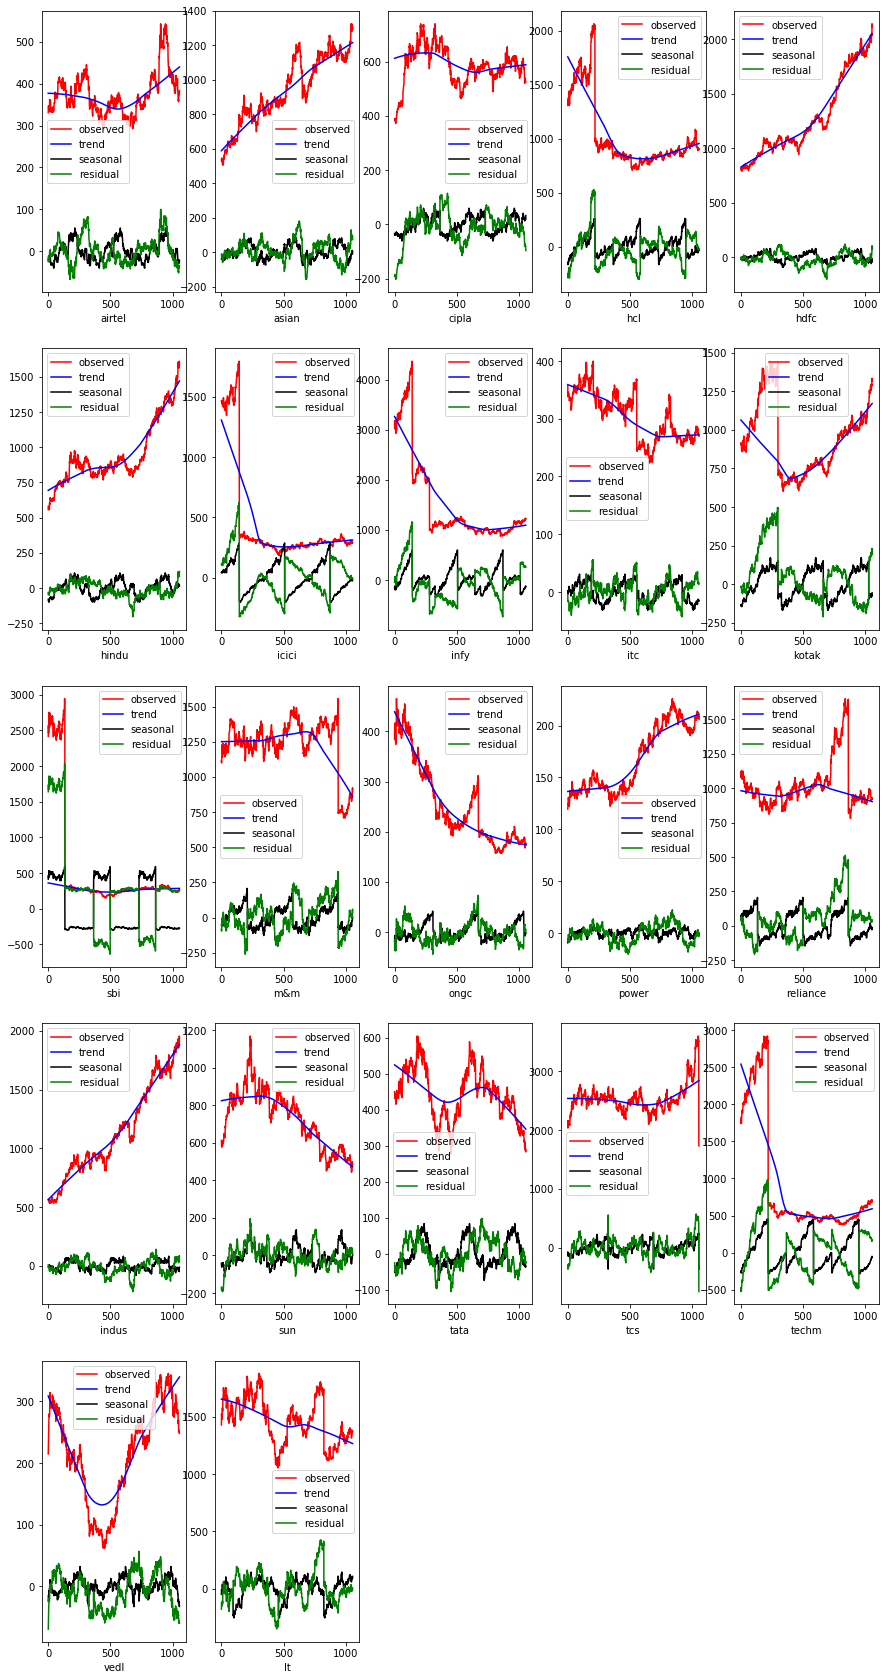

In [0]:
from matplotlib import pyplot
pyplot.figure(figsize=(15,30))
x=[i for i in range(len(out[0].observed))]
i=0
for var in res.columns:
    pyplot.subplot(5,5,i+1)
    pyplot.xlabel(res.columns.values[i])
    pyplot.plot(x,out[i].observed,c='red',label='observed')
    pyplot.plot(x,out[i].trend,c='blue',label='trend')
    pyplot.plot(x,out[i].seasonal,c='black',label='seasonal')
    pyplot.plot(x,out[i].resid,c='green',label='residual')
    i+=1
    pyplot.legend()

In [0]:
output=[]
for i in range(len(out)):
    output.append(out[i].resid.values)
residual_df=pd.DataFrame(output)
residual_df=residual_df.T
residual_df.index=res.index
residual_df.columns=res.columns
residual_df.head()

,airtel,asian,cipla,hcl,hdfc,hindu,icici,infy,itc,kotak,...,ongc,power,reliance,indus,sun,tata,tcs,techm,vedl,lt
2014-05-16,-22.493062,-11.847420,-190.494629,-249.069201,-4.666968,-33.109655,113.458866,42.991954,-4.286905,-17.851410,...,-36.667265,-7.691550,50.610818,8.035823,-169.169828,-25.761488,-304.160081,-473.542765,-69.620266,-176.665762
2014-05-19,-19.891867,-25.077483,-189.078214,-289.674483,1.043801,-47.254264,116.758283,-49.329498,-16.825325,-13.777317,...,-14.918427,-7.063774,60.873684,-1.369578,-183.153901,-34.922420,-367.246680,-526.146948,-62.665237,-119.879785
2014-05-20,-12.124005,-24.474212,-186.378467,-280.129765,3.687903,-41.665539,106.724367,36.715716,-16.163744,-19.919891,...,-23.536256,-5.402664,33.719884,-8.258311,-176.837975,-36.400019,-357.249947,-501.501130,-47.210209,-127.710474
2014-05-21,-17.722810,-11.520942,-187.645386,-258.885046,-5.184661,-36.960147,104.540451,66.660931,-15.635496,-25.245798,...,-23.670752,-5.991554,34.349418,-5.663711,-185.155381,-33.760951,-313.253214,-508.338646,-41.805180,-144.891163
2014-05-22,-23.621615,-22.784338,-185.362305,-265.506994,-9.957226,-33.654756,112.989869,38.772812,-14.923916,-27.321705,...,-27.871914,-5.613778,50.645618,-2.902445,-186.406122,-49.071884,-290.973147,-503.009495,-35.383484,-148.905186


**Preprocessing the input**

The residuals that are generated are then preprocessed and then placed into the corresponding files.

The preprocessing here involves scling down of the values in the range of -1 to 1 thus reducing the range of values that LSTM will have to deal.

In [0]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaled_residual=scaler.fit_transform(residual_df)
scaled_residual_df=pd.DataFrame(scaled_residual,index=residual_df.index,columns=residual_df.columns)
scaled_residual_df

,airtel,asian,cipla,hcl,hdfc,hindu,icici,infy,itc,kotak,...,ongc,power,reliance,indus,sun,tata,tcs,techm,vedl,lt
2014-05-16,-0.461203,-0.139089,-0.922532,-0.870742,0.222156,0.061289,-0.079519,-0.180564,-0.216441,-0.451348,...,-0.869666,-0.412100,-0.286450,0.257436,-0.878427,-0.215239,-0.327012,-0.930301,-1.000000,-0.554036
2014-05-19,-0.430144,-0.217266,-0.913616,-0.968341,0.257350,-0.026227,-0.072567,-0.277904,-0.469733,-0.439855,...,-0.499511,-0.382736,-0.257860,0.205280,-0.950280,-0.305295,-0.422368,-1.000000,-0.889879,-0.407634
2014-05-20,-0.337395,-0.213702,-0.896624,-0.945400,0.273645,0.008352,-0.093708,-0.187182,-0.456368,-0.457183,...,-0.646183,-0.305039,-0.333503,0.167079,-0.917828,-0.319821,-0.407258,-0.967345,-0.645175,-0.427823
2014-05-21,-0.404245,-0.137160,-0.904598,-0.894335,0.218965,0.037465,-0.098309,-0.155609,-0.445697,-0.472207,...,-0.648472,-0.332584,-0.331749,0.181467,-0.960564,-0.293877,-0.340757,-0.976404,-0.559596,-0.472117
2014-05-22,-0.474678,-0.203716,-0.890228,-0.910252,0.189553,0.057917,-0.080507,-0.185013,-0.431322,-0.478062,...,-0.719974,-0.314914,-0.286353,0.196780,-0.966991,-0.444391,-0.307080,-0.969343,-0.457920,-0.482465
2014-05-23,-0.398446,-0.216598,-0.908587,-0.887110,0.093377,0.056609,-0.063758,-0.216754,-0.453983,-0.513585,...,-0.578448,-0.112487,-0.239610,0.146102,-0.953207,-0.461537,-0.305246,-0.926398,-0.327743,-0.476400
2014-05-26,-0.486802,-0.277836,-0.956119,-0.825754,0.130625,0.031019,-0.066298,-0.202761,-0.448420,-0.543341,...,-0.569883,-0.175803,-0.334733,0.107802,-0.960110,-0.352776,-0.286388,-0.903865,-0.203748,-0.397201
2014-05-27,-0.492374,-0.351680,-0.963053,-0.838830,0.148461,-0.032933,-0.083552,-0.182478,-0.469118,-0.526647,...,-0.658045,-0.262507,-0.360864,0.103792,-0.994673,-0.417686,-0.340862,-0.861347,-0.215126,-0.417949
2014-05-28,-0.493170,-0.353630,-0.965476,-0.735691,0.214161,-0.004797,-0.062600,-0.149033,-0.489143,-0.556779,...,-0.772305,-0.313350,-0.371487,0.109578,-0.998150,-0.475059,-0.288271,-0.824968,-0.242602,-0.371621
2014-05-29,-0.514662,-0.415951,-1.000000,-0.808617,0.160200,-0.038741,-0.084945,-0.327653,-0.496038,-0.559267,...,-0.889968,-0.338468,-0.392836,0.015178,-1.000000,-0.528172,-0.290070,-0.829796,-0.290134,-0.438259


In [0]:
scaled_residual_df.to_csv("scaled_residual_df.csv")
scaled_residual_df.describe().to_csv("scaled_mean_and_std.csv")